# Test Yolo Inference

In [1]:
import services.ai_services.my_models as Models
import services.image_handler.utils as IMUtils
import services.ai_services.inferences as INF

In [ ]:
yolo = Models.YOLOv8(Models.YoloType.Custom.Plate_best)

In [ ]:
image = IMUtils.read_image('C:/Users/Alireza/Desktop/plate/2171038_FRONT.jpg')
image_rgb = IMUtils.convert_to_rgb(image)
image2 = IMUtils.read_image('C:/Users/Alireza/Desktop/plate/2170593_FRONT.jpg')
image_rgb2 = IMUtils.convert_to_rgb(image2)
IMUtils.show_image(image_rgb)
IMUtils.show_image(image_rgb2)
images = [image, image2]

In [6]:
inference = INF.YOLOInference(yolo)

In [ ]:
cropped_out = inference.run_full_pipeline(images)
for i in cropped_out:
    IMUtils.show_image(i, turn_grey=True, cmap='grey')

# Get and Save Plates

In [1]:
import services.image_handler.utils as IMUtils
import services.ai_services.inferences as INF
import services.ai_services.my_models as Models

In [2]:
images = IMUtils.read_images_from_file("C:/Users/Alireza/Desktop/cars/")

Reading images: 100%|██████████| 139/139 [00:02<00:00, 64.51file/s]


In [4]:
model = Models.YOLOv8(Models.YoloType.Custom.Plate_best)
inference = INF.YOLOInference(model)

Loading YOLO model from weights/best(plate).pt ...

Layer (type:depth-idx)                                       Param #
YOLO                                                         --
├─DetectionModel: 1-1                                        --
│    └─Sequential: 2-1                                       --
│    │    └─Conv: 3-1                                        (1,392)
│    │    └─Conv: 3-2                                        (41,664)
│    │    └─C2f: 3-3                                         (111,360)
│    │    └─Conv: 3-4                                        (166,272)
│    │    └─C2f: 3-5                                         (813,312)
│    │    └─Conv: 3-6                                        (664,320)
│    │    └─C2f: 3-7                                         (3,248,640)
│    │    └─Conv: 3-8                                        (1,991,808)
│    │    └─C2f: 3-9                                         (3,985,920)
│    │    └─SPPF: 3-10                       

In [5]:
cropped_out = inference.run_full_pipeline(images)

Running full pipeline... 

conf=0.5, show=False, save=False
Running inference on Image

0: 640x640 1 plate, 19.2ms
1: 640x640 1 plate, 19.2ms
2: 640x640 1 plate, 19.2ms
3: 640x640 1 plate, 19.2ms
4: 640x640 2 plates, 19.2ms
5: 640x640 8 plates, 19.2ms
6: 640x640 6 plates, 19.2ms
7: 640x640 1 plate, 19.2ms
8: 640x640 1 plate, 19.2ms
9: 640x640 1 plate, 19.2ms
10: 640x640 2 plates, 19.2ms
11: 640x640 1 plate, 19.2ms
12: 640x640 1 plate, 19.2ms
13: 640x640 1 plate, 19.2ms
14: 640x640 1 plate, 19.2ms
15: 640x640 1 plate, 19.2ms
Speed: 17.1ms preprocess, 19.2ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)
Yolo results are generated for batch 0 

Found Bounding Boxes
Images were cropped 

conf=0.5, show=False, save=False
Running inference on Image

0: 640x640 1 plate, 17.3ms
1: 640x640 1 plate, 17.3ms
2: 640x640 1 plate, 17.3ms
3: 640x640 1 plate, 17.3ms
4: 640x640 1 plate, 17.3ms
5: 640x640 2 plates, 17.3ms
6: 640x640 1 plate, 17.3ms
7: 640x640 1 plate, 17.3ms
8: 640x640

In [6]:
output_dir = "C:/Users/Alireza/Desktop/plates/"
IMUtils.save_cropped_images(cropped_out, output_dir)

Saving images: 100%|██████████| 190/190 [00:00<00:00, 689.37file/s]

Files were saved successfully in C:/Users/Alireza/Desktop/plates/ 



# test

(array([0.02825701, 0.09577547]),
 array([0.03425093, 0.86719203]),
 array([0.97101385, 0.8219808 ]),
 array([0.96844503, 0.07316985]))

In [ ]:
dst_points = np.array([[0, 0], [image_width, 0], [image_width, image_height], [0, image_height]], dtype=np.float32)
src_points  = np.array(list(shape_corners.values()), dtype=np.float32)

M = cv2.getPerspectiveTransform(src_points, dst_points)
rectified_image = cv2.warpPerspective(gray_image_1, M, (image_width, image_height))

plt.imshow(rectified_image, cmap='gray')
plt.axis('off')
plt.show()

# test 2

In [21]:
from services.ai_services.my_models import Plate_ResNet
import services.ai_services.utils as AIUtils
from torch.utils.data import DataLoader

In [48]:
device = AIUtils.select_device()
res = Plate_ResNet(device=device)

NVIDIA GeForce GTX 1660 Ti have been located and selected
Selected model is ResNetType.Base
ResNet18
Layer (type:depth-idx)                        Param #
CustomResNet                                  --
├─ResNet: 1-1                                 --
│    └─Conv2d: 2-1                            9,408
│    └─BatchNorm2d: 2-2                       128
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   73,984
│    │    └─BasicBlock: 3-2                   73,984
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   230,144
│    │    └─BasicBlock: 3-4                   295,424
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   919,040
│    │    └─BasicBlock: 3-6                   1,180,672
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7

In [49]:
res.freeze_unfreeze(True)
res.write_summary()

Start freezing feature extractor ...
Feature extractor freezed
Model is in cuda
Layer (type:depth-idx)                        Param #
CustomResNet                                  --
├─ResNet: 1-1                                 --
│    └─Conv2d: 2-1                            (9,408)
│    └─BatchNorm2d: 2-2                       (128)
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   (73,984)
│    │    └─BasicBlock: 3-2                   (73,984)
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   (230,144)
│    │    └─BasicBlock: 3-4                   (295,424)
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   (919,040)
│    │    └─BasicBlock: 3-6                   (1,180,672)
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7     

In [34]:
train_dataset = AIUtils.CustomResNetDataset("C:/Users/Alireza/Desktop/plate_data/train/images",
                                            "C:/Users/Alireza/Desktop/plate_data/train/labels")
train_loader = DataLoader(train_dataset, 16, shuffle=True)

valid_dataset = AIUtils.CustomResNetDataset("C:/Users/Alireza/Desktop/plate_data/valid/images",
                                            "C:/Users/Alireza/Desktop/plate_data/valid/labels")
valid_loader = DataLoader(valid_dataset, 16, shuffle=True)

In [35]:
import torch.nn as nn
import torch.optim as optim

In [58]:
lr=0.001
weight_decay=0.001
optimizer = optim.Adam(res.model.parameters(), lr=lr, weight_decay=weight_decay)
criterion = nn.MSELoss()

res.train(train_loader,
          valid_loader,
          optimizer,
          weight_decay=weight_decay,
          lr=lr,
          epochs=20,
          loss_fn=criterion)

Starting training process for model ResNetType.Base ...
Hyper Parameters:
-Epochs Number = 20
-Learning Rate = 0.001
-Weight Decay = 0.001
-Loss Function = MSELoss()
-Optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.001
) 



Epoch  0: Train loss=0.029, Val loss=26.082


Epoch  1: Train loss=0.178, Val loss=31.976


Epoch  2: Train loss=0.156, Val loss=26.053


Epoch  3: Train loss=0.181, Val loss=26.144


Epoch  4: Train loss=0.044, Val loss=26.146


Epoch  5: Train loss=0.130, Val loss=26.125


Epoch  6: Train loss=0.013, Val loss=32.025


Epoch  7: Train loss=0.095, Val loss=32.043


Epoch  8: Train loss=0.387, Val loss=38.008


Epoch  9: Train loss=0.252, Val loss=26.076


Epoch 10: Train loss=0.046, Val loss=26.073


Epoch 11: Train loss=0.039, Val loss=26.078


Epoch 12: Train loss=0.057, Val loss=26.082


Epoch 13: Train loss=0.028, Val loss=26.088


Epoch 14: Train loss=0.025, Val loss=32.042


Epoch 15: Train loss=0.135, Val loss=32.028


Epoch 16: Train loss=0.056, Val loss=32.032


Epoch 17: Train loss=0.076, Val loss=26.077


Epoch 18: Train loss=0.063, Val loss=26.142


Epoch 19: Train loss=0.060, Val loss=26.146

Training completed


In [59]:
his = res.model_training_history

In [60]:
import matplotlib.pyplot as plt

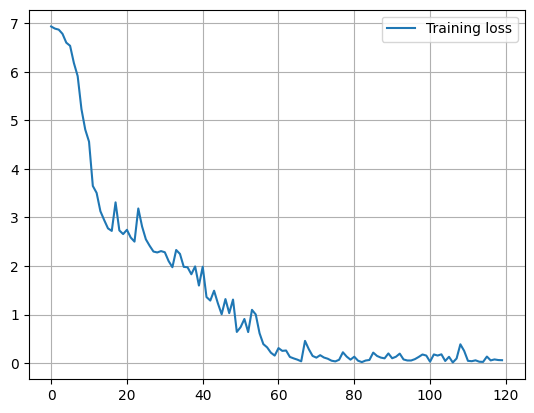

In [61]:
plt.plot(his['train_loss'], label='Training loss')
plt.legend()
plt.grid()
plt.show()

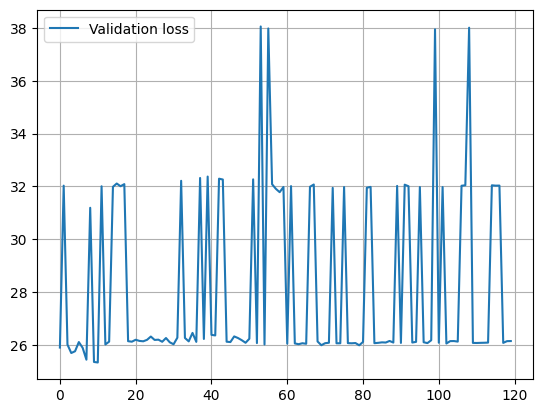

In [62]:
plt.plot(his['valid_loss'], label='Validation loss')
plt.legend()
plt.grid()
plt.show()

In [64]:
len(res.model_training_history["train_loss"])

120

In [33]:
a = valid_loader.__iter__().__next__()

In [28]:
import torch

In [34]:
with torch.no_grad():
    m = res.model(a[0].to(res.device)).cpu().numpy()
m

array([[[    0.24155,   -0.040253],
        [    0.85429,    -0.13761],
        [      0.934,      1.0186],
        [    0.12348,    0.042492]],

       [[    0.14178,     0.28619],
        [     1.3782,    0.087273],
        [     1.0934,     0.92714],
        [    0.04031,      1.2256]],

       [[   0.045588,     0.62512],
        [     1.2224,     -0.2896],
        [     2.6139,      2.8428],
        [   -0.37904,      1.0158]],

       [[  -0.040801,     0.32759],
        [     1.9766,   -0.014619],
        [   -0.71551,    -0.73281],
        [  -0.072931,      1.6024]],

       [[    0.19443,     0.15916],
        [    0.49656,     0.10311],
        [      2.261,      2.0841],
        [    0.22242,   -0.044847]],

       [[     0.3067,      0.3338],
        [    0.26198,    0.014129],
        [     2.0045,      1.8181],
        [   0.086144,     0.21134]],

       [[    0.19486,     0.17881],
        [    0.74568,    0.035333],
        [     1.8891,      1.6721],
        [    0.1